<a href="https://colab.research.google.com/github/Asadsammar/ML_Assignment_W13/blob/main/Assignment_W13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,547 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [5]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [6]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

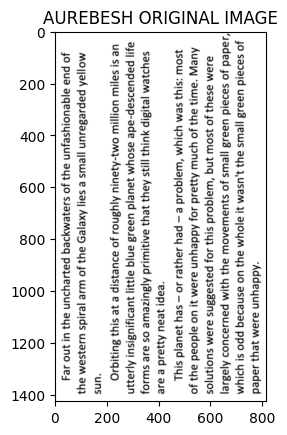

In [7]:
# Plot original image

image = cv2.imread('/content/drive/MyDrive/hitchhikers-rotated.png')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('AUREBESH ORIGINAL IMAGE')
plt.show()

In [8]:
# Preprocess image

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

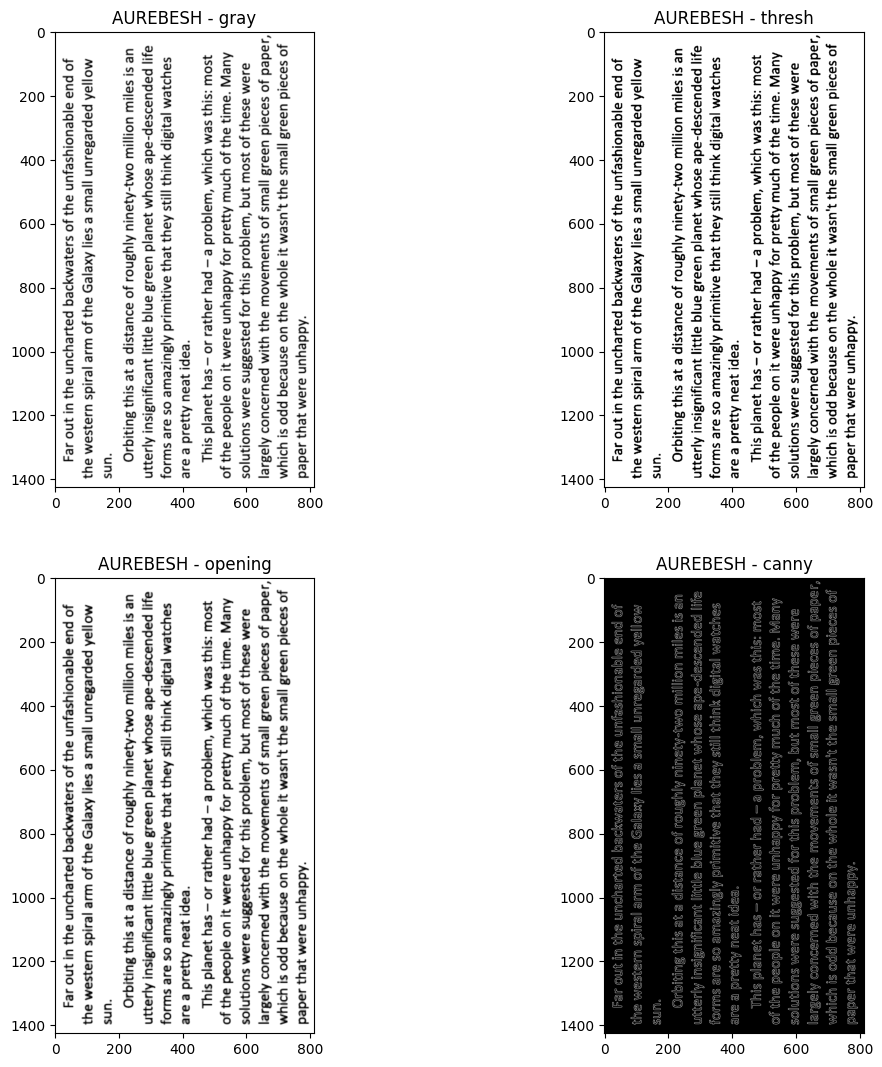

In [ ]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('AUREBESH - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

In [ ]:

# Get the OCR data from the image
data = pytesseract.image_to_osd(image)

# Parse the data to get the rotation angle and script type
lines = data.split('\n')
angle = lines[2].split()[-1]
script = lines[3].split()[-1]

# Display the results
print(f'Rotation angle: {angle} degrees')
print(f'Script type: {script}')


Rotation angle: 90 degrees
Script type: 17.90


In [ ]:
# Get the orientation and script type from Tesseract
osd = pytesseract.image_to_osd(image)

# Print the results
print(osd)

Page number: 0
Orientation in degrees: 270
Rotate: 90
Orientation confidence: 17.90
Script: Latin
Script confidence: 2.25



In [ ]:

# Rotate the image by 90 degrees clockwise to correct the orientation
img = cv2.rotate(gray, cv2.ROTATE_90_CLOCKWISE)

In [ ]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> AFTER ROTATION')
print('-----------------------------------------')
print(pytesseract.image_to_string(img, config=custom_config))
print('\n-----------------------------------------')

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
-
w os
- St wu + 2 a °
oe = @ YOoOg on
°o Yue ome cqw
T= wn Vo ESve @G
oY ota wo SF OS
— nw
vo Eos ceee¢oe
= oOo _ En y
a oO a a + = o oO
so Caf or coc UVa
o Oo pa
Co = 9 & S2o2°% Mw
S$ Ee0 ZS 3 Es
ws a x Stuaé
£5 Qwest feo OMG
c Sus Soe
S= #388 SER?
fs FSS EEBER
Sa vo; YV>m ae
Oo w ce OU G o
gy 2 +A2S aanvs
= a c
> $28 o5 85H
& > os |f ae
s = og o>u oO
x<~ © - © W oO Sc
oOo WM _- o> ac
= <= ~ Os
So 9 ae ~«§ SLE
cx a a ofo w
32 cat $528 y
e
ro So? fBagteca
Co ¢ SEF. ce grnse?re
Sec sbEewpgosutevs
<c & or in | F MSG
> es CN= gH Meas
w@ & SER ®SCHAVZ YD
© 38 Y= a@f£OoqgEPs
=- & - 2 wa
~~” cic crore Gg
coc Seger eaoys
—_ i. —_
+ Oo ~ayb oO 5 0%
a 4+ = £Lc ved ¥ x
on Sr Bet acVus
. ¥ BS2z>yvart*BZyglFert
oF .S5E*C SCL GSS
uw c OW ree Sd m=z a
25 B52 -¥ oka
$a S26 on Sa


-----------------------------------------
TESSERACT OUTPUT --> AFTER ROTATION
-----------------------